In [1]:
import numpy as np
import pandas as pd
import talib
import plotly.graph_objects as go
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn import linear_model


In [65]:
datapath = "/Users/zed/AI_Lab/DoubleEnsembleML/report/mybtc.csv"

In [66]:
df = pd.read_csv(datapath,index_col = 0)

In [7]:
data = df.drop(['Date'],axis=1)

In [8]:
from final_model import DEnsembleModel
model = DEnsembleModel()
model.fit(data)

/Users/zed/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zed/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zed/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zed/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A col

In [24]:
pred  = model.predict(df)
y = df.tag
t = 0.4
pred = pred.apply(lambda x:1 if x>= t else (-1 if x<=-t else 0))
(y == pred).sum()/y.shape[0]

0.7363809523809524

In [25]:
pred.to_csv("pred.csv")

In [77]:
a = pd.concat([df1.Date,df,pred],axis=1)

In [86]:
a['pre'] = a[0]

In [81]:
a.to_csv("pred.csv",index= None )

In [83]:
a 

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,tag,0
0,2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,1.315147e+04,841.835522,0,1
1,2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,1.609733e+04,839.156269,0,1
2,2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6.784250e+03,831.572913,0,0
3,2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6.780220e+03,844.938794,0,0
4,2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,1.669857e+04,890.671709,0,0
...,...,...,...,...,...,...,...,...,...,...
2652,2021-04-21,56500.00000,56805.50000,53600.00000,53815.20000,4788.013532,2.645352e+08,55249.477244,1,1
2653,2021-04-22,53815.30000,55459.40000,50500.00000,51730.00000,10144.204074,5.396125e+08,53194.167081,1,1
2654,2021-04-23,51709.30000,52124.40000,47549.30000,51178.70000,11159.243380,5.545896e+08,49697.773594,1,0
2655,2021-04-24,51178.60000,51200.00000,48746.40000,50093.40000,4039.459093,2.021033e+08,50032.268888,1,1


In [87]:
a = a.drop([0],axis = 1)

In [90]:
a.to_csv("pred.csv",index = None)

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,data.iloc[:,-1])
cm

[[568 101   2]
 [120 505  69]
 [ 68 332 860]]


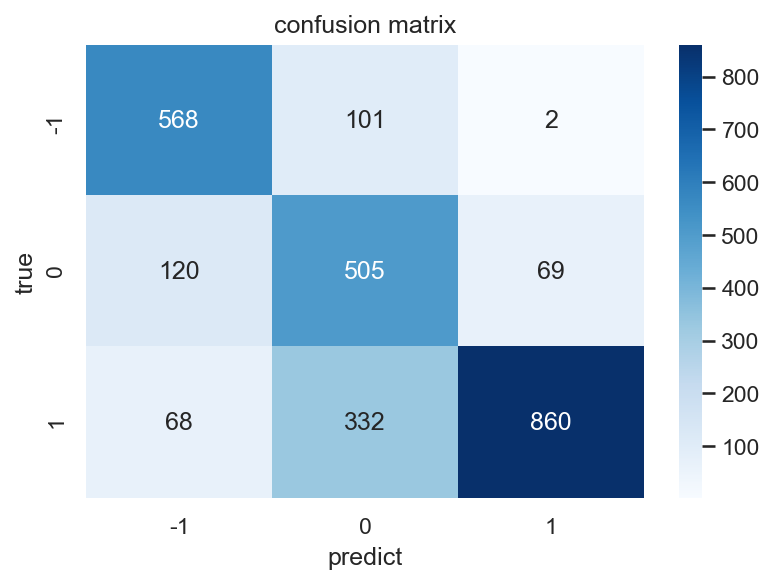

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot(matrix):
  sns.set()
  f,ax=plt.subplots(dpi = 150)
  print(matrix) #打印出来看看
  
  sns.heatmap(matrix,annot=True,cmap="Blues",fmt='.20g',ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1]) #画热力图
  ax.set_title('confusion matrix') #标题
  ax.set_xlabel('predict') #x轴
  ax.set_ylabel('true') #y轴
  f.savefig('cm_lr.png')

matrix = cm 
plot(matrix)# 画原始的数据
# matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]  
# con_mat_norm = np.around(matrix, decimals=2)
# plot(con_mat_norm)# 画比例数据


In [33]:
import sklearn 

In [48]:
y_true = data.iloc[:,-1]

In [44]:
y_pred = pred 

In [75]:
df['pred'] = pred 

In [79]:
df.to_csv('pred.csv',index = None)

In [78]:
df 

,Date,High,Low,Close,Volume,Open,H-L,3day MA,10day MA,30day MA,...,ATR,OBV,HT_DCPERIOD,Last1Price,Last2Price,Last3Price,Last4Price,Last5Price,tag,pred
32,2014-02-08,730.0000,680.01000,699.30255,31.042254,714.12206,49.99000,761.410300,796.146558,819.809884,...,40.886460,-168.377924,15.646696,714.12206,767.60884,802.50000,802.40000,819.78000,-1,-1
33,2014-02-09,756.0998,684.85098,689.00000,38.291274,699.30255,71.24882,727.011150,786.576813,815.057658,...,45.223940,-206.669198,17.190252,699.30255,714.12206,767.60884,802.50000,802.40000,-1,0
34,2014-02-10,748.0000,550.00000,690.20000,29.856668,689.00000,198.00000,700.808203,774.676813,809.446639,...,67.049091,-176.812530,18.731589,689.00000,699.30255,714.12206,767.60884,802.50000,0,-1
35,2014-02-11,720.0000,660.00000,714.56111,33.331274,690.20000,60.00000,692.834183,762.477776,802.458604,...,66.042078,-143.481256,20.302886,690.20000,689.00000,699.30255,714.12206,767.60884,1,1
36,2014-02-12,709.9300,651.30901,670.66590,17.641851,714.56111,58.62099,697.920370,751.433887,797.610641,...,65.643510,-161.123107,21.888230,714.56111,690.20000,689.00000,699.30255,714.12206,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,2021-04-21,56805.5000,53600.00000,53815.20000,4788.013532,56500.00000,3205.50000,56153.266667,59957.890000,57851.923333,...,3594.414995,606743.431869,15.992169,56500.00000,55720.00000,56239.80000,60085.20000,61455.00000,-1,-1
2653,2021-04-22,55459.4000,50500.00000,51730.00000,10144.204074,53815.20000,4959.40000,55345.066667,59343.810000,57842.593333,...,3789.412853,596599.227795,15.760320,53815.20000,56500.00000,55720.00000,56239.80000,60085.20000,-1,-1
2654,2021-04-23,52124.4000,47549.30000,51178.70000,11159.243380,51730.00000,4575.10000,54015.066667,58534.440000,57755.216667,...,3901.653874,585439.984415,15.631061,51730.00000,53815.20000,56500.00000,55720.00000,56239.80000,-1,-1
2655,2021-04-24,51200.0000,48746.40000,50093.40000,4039.459093,51178.70000,2453.60000,52241.300000,57293.590000,57718.046667,...,3694.789035,581400.525322,15.618939,51178.70000,51730.00000,53815.20000,56500.00000,55720.00000,-1,-1


In [77]:
df.columns

Index(['Date', 'High', 'Low', 'Close', 'Volume', 'Open', 'H-L', '3day MA',
       '10day MA', '30day MA', 'CCI', 'RSI', 'ATR', 'OBV', 'HT_DCPERIOD',
       'Last1Price', 'Last2Price', 'Last3Price', 'Last4Price', 'Last5Price',
       'tag', 'pred'],
      dtype='object')

In [72]:
a.shape

(2625, 22)

In [45]:
sklearn.metrics.precision_score(y_true=y, y_pred=y_pred, labels=[-1,0,1], average='micro')

0.7363809523809524

In [60]:
accuracy = sklearn.metrics.accuracy_score(y_true=y_true, y_pred=y_pred)
precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, labels=[-1,0, 1], average='weighted')
recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, labels=[-1,0, 1], average='weighted')

f1 = sklearn.metrics.f1_score(y_true=y_true, y_pred=y_pred, labels=[0, 1], average='weighted')
print('Accuracy: {0:0.4f}'.format(accuracy))
print('Precision: {0:0.4f}'.format(precision))
print('Recall: {0:0.4f}'.format(recall))
print('F1: {0:0.4f}'.format(f1))

In [46]:
def report_evaluation_metrics(y_true, y_pred):
    accuracy = sklearn.metrics.accuracy_score(y_true=y_true, y_pred=y_pred)
    precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, labels=[-1,0, 1], average='micro')
    recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, labels=[-1,0, 1], pos_label=3)
    average_precision = sklearn.metrics.average_precision_score(y_true=y_true, y_score=y_pred,average='micro')
    f1 = sklearn.metrics.f1_score(y_true=y_true, y_pred=y_pred, labels=[0, 1], pos_label=3)
    print('Accuracy: {0:0.2f}'.format(accuracy))
    print('Precision: {0:0.2f}'.format(precision))
    print('Recall: {0:0.2f}'.format(recall))
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('F1: {0:0.2f}'.format(f1))
    print("confusion matrix:", conf_matrix)
    train_matrix = confusion_matrix(y_true, y_pred)


report_evaluation_metrics(data.iloc[:,-1],pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].